# Assignment 5: Prediction by Regression

Description

In the file china_gdp.csv you will find historic data about the development of China's gross domestic product (GDP).

Your task is to train a model that fits to the data and use the model for prediction of the GDP values of years 2010, 2020, and 2022.


Please, submit a Python solution and elaborate on the following questions related to it:

What type/s of regression have you applied?

Which were the challenges?

How accurate is your solution?

What else could be done for improvement of the accuracy?


This is a group project.

The solution brings two more study points to your collection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

## Enter data

In [2]:
# Enter data
df = pd.read_csv('./china_gdp.csv')

In [3]:
#display the first 5 rows
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
# See the shape (number rows) and size (number of columns)
df.shape

(55, 2)

## Study the data

In [5]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Preprocessing data

In [6]:
# Split X and y
X, y = df['Year'], df['Value']

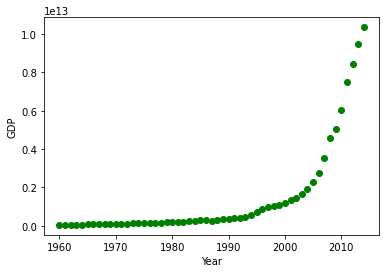

In [7]:
# Plot all
plt.xlabel('Year')
plt.ylabel('GDP')
plt.scatter(X, y, color='green')
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

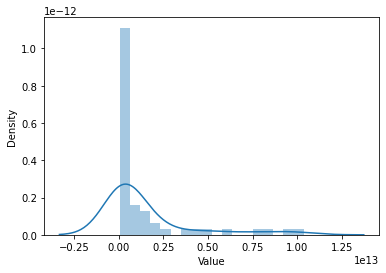

In [8]:
sns.distplot(df['Value'], label='GDP', norm_hist=True)

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

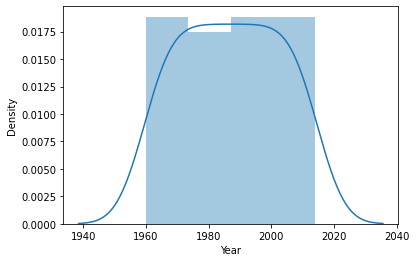

In [9]:
sns.distplot(df['Year'], label='Year', norm_hist=True)

In [10]:
#What is the correlation
corr_matrix = df.corr()
corr_matrix

,Year,Value
Year,1.000000,0.723858
Value,0.723858,1.000000


## Train model

In [11]:
X

0     1960
1     1961
2     1962
3     1963
4     1964
5     1965
6     1966
7     1967
8     1968
9     1969
10    1970
11    1971
12    1972
13    1973
14    1974
15    1975
16    1976
17    1977
18    1978
19    1979
20    1980
21    1981
22    1982
23    1983
24    1984
25    1985
26    1986
27    1987
28    1988
29    1989
30    1990
31    1991
32    1992
33    1993
34    1994
35    1995
36    1996
37    1997
38    1998
39    1999
40    2000
41    2001
42    2002
43    2003
44    2004
45    2005
46    2006
47    2007
48    2008
49    2009
50    2010
51    2011
52    2012
53    2013
54    2014
Name: Year, dtype: int64

In [12]:
y

0     5.918412e+10
1     4.955705e+10
2     4.668518e+10
3     5.009730e+10
4     5.906225e+10
5     6.970915e+10
6     7.587943e+10
7     7.205703e+10
8     6.999350e+10
9     7.871882e+10
10    9.150621e+10
11    9.856202e+10
12    1.121598e+11
13    1.367699e+11
14    1.422547e+11
15    1.611625e+11
16    1.516277e+11
17    1.723490e+11
18    1.483821e+11
19    1.768565e+11
20    1.896500e+11
21    1.943690e+11
22    2.035496e+11
23    2.289502e+11
24    2.580821e+11
25    3.074796e+11
26    2.988058e+11
27    2.713498e+11
28    3.107222e+11
29    3.459575e+11
30    3.589732e+11
31    3.814547e+11
32    4.249341e+11
33    4.428746e+11
34    5.622611e+11
35    7.320320e+11
36    8.608441e+11
37    9.581594e+11
38    1.025277e+12
39    1.089447e+12
40    1.205261e+12
41    1.332235e+12
42    1.461906e+12
43    1.649929e+12
44    1.941746e+12
45    2.268599e+12
46    2.729784e+12
47    3.523094e+12
48    4.558431e+12
49    5.059420e+12
50    6.039659e+12
51    7.492432e+12
52    8.4616

In [13]:
# Split X and y
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

In [14]:
# Splitting into the training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_split = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression First

In [15]:
# creating Linear Regression model
linreg = LinearRegression()

# Fitting the model to our data
linreg.fit(X,y)

LinearRegression()

In [16]:
y_predicted = linreg.predict(X)
y_predicted

array([-1.61287007e+12, -1.49991037e+12, -1.38695067e+12, -1.27399097e+12,
       -1.16103127e+12, -1.04807157e+12, -9.35111873e+11, -8.22152173e+11,
       -7.09192474e+11, -5.96232774e+11, -4.83273075e+11, -3.70313376e+11,
       -2.57353676e+11, -1.44393977e+11, -3.14342771e+10,  8.15254223e+10,
        1.94485122e+11,  3.07444821e+11,  4.20404521e+11,  5.33364220e+11,
        6.46323920e+11,  7.59283619e+11,  8.72243319e+11,  9.85203018e+11,
        1.09816272e+12,  1.21112242e+12,  1.32408212e+12,  1.43704182e+12,
        1.55000152e+12,  1.66296121e+12,  1.77592091e+12,  1.88888061e+12,
        2.00184031e+12,  2.11480001e+12,  2.22775971e+12,  2.34071941e+12,
        2.45367911e+12,  2.56663881e+12,  2.67959851e+12,  2.79255821e+12,
        2.90551791e+12,  3.01847761e+12,  3.13143731e+12,  3.24439701e+12,
        3.35735671e+12,  3.47031641e+12,  3.58327611e+12,  3.69623581e+12,
        3.80919550e+12,  3.92215520e+12,  4.03511490e+12,  4.14807460e+12,
        4.26103430e+12,  

In [17]:
y

array([5.91841165e+10, 4.95570502e+10, 4.66851785e+10, 5.00973033e+10,
       5.90622549e+10, 6.97091531e+10, 7.58794348e+10, 7.20570286e+10,
       6.99934979e+10, 7.87188205e+10, 9.15062113e+10, 9.85620238e+10,
       1.12159814e+11, 1.36769878e+11, 1.42254742e+11, 1.61162492e+11,
       1.51627687e+11, 1.72349014e+11, 1.48382112e+11, 1.76856525e+11,
       1.89649992e+11, 1.94369049e+11, 2.03549627e+11, 2.28950201e+11,
       2.58082147e+11, 3.07479586e+11, 2.98805793e+11, 2.71349773e+11,
       3.10722214e+11, 3.45957486e+11, 3.58973230e+11, 3.81454704e+11,
       4.24934066e+11, 4.42874596e+11, 5.62261130e+11, 7.32032045e+11,
       8.60844098e+11, 9.58159425e+11, 1.02527690e+12, 1.08944711e+12,
       1.20526068e+12, 1.33223472e+12, 1.46190649e+12, 1.64992872e+12,
       1.94174560e+12, 2.26859890e+12, 2.72978403e+12, 3.52309431e+12,
       4.55843107e+12, 5.05941974e+12, 6.03965851e+12, 7.49243210e+12,
       8.46162316e+12, 9.49060260e+12, 1.03548317e+13])

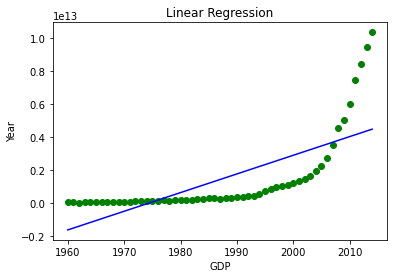

In [18]:
# Visualise the Linear Regression

plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('GDP')
plt.ylabel('Year')
plt.show()

#### A simple linear regression seems to be not very usefull

#### Lets try with a Polynormial regression

**NOTE**

With the increasing degree of the polynomial, the complexity of the model also increases. Therefore, the value of n must be chosen precisely. If this value is low, then the model won’t be able to fit the data properly and if high, the model will overfit the data easily.

In [34]:
# Polynomial regression model
polyreg = PolynomialFeatures(degree=10)

# Transforming my train data to adjust the polynom to linear regression
X_pol = polyreg.fit_transform(X)

In [35]:
# Creating linear Regression model
pollinreg = LinearRegression()
pollinreg .fit(X_pol, y)

LinearRegression()

In [36]:
# Apply the model to my train data
y_predicted = pollinreg.predict(X_pol)

In [37]:
y_predicted

array([-6.63612206e+11, -4.43900597e+11, -2.50812262e+11, -8.30762691e+10,
        6.05931181e+10,  1.81496526e+11,  2.80949570e+11,  3.60282945e+11,
        4.20842524e+11,  4.63989446e+11,  4.91100218e+11,  5.03566807e+11,
        5.02796735e+11,  4.90213177e+11,  4.67255058e+11,  4.35377148e+11,
        3.96050160e+11,  3.50760852e+11,  3.01012119e+11,  2.48323095e+11,
        1.94229252e+11,  1.40282501e+11,  8.80512867e+10,  3.91206957e+10,
       -4.90744942e+09, -4.24144848e+10, -7.17648060e+10, -9.13057642e+10,
       -9.93675646e+10, -9.42631640e+10, -7.42881644e+10, -3.77207138e+10,
        1.71786024e+10,  9.21668625e+10,  1.89018917e+11,  3.09527491e+11,
        4.55503293e+11,  6.28775119e+11,  8.31189962e+11,  1.06461312e+12,
        1.33092829e+12,  1.63203770e+12,  1.96986221e+12,  2.34634139e+12,
        2.76343370e+12,  3.22311651e+12,  3.72738628e+12,  4.27825865e+12,
        4.87776855e+12,  5.52797029e+12,  6.23093772e+12,  6.98876431e+12,
        7.80356324e+12,  

In [38]:
y

array([5.91841165e+10, 4.95570502e+10, 4.66851785e+10, 5.00973033e+10,
       5.90622549e+10, 6.97091531e+10, 7.58794348e+10, 7.20570286e+10,
       6.99934979e+10, 7.87188205e+10, 9.15062113e+10, 9.85620238e+10,
       1.12159814e+11, 1.36769878e+11, 1.42254742e+11, 1.61162492e+11,
       1.51627687e+11, 1.72349014e+11, 1.48382112e+11, 1.76856525e+11,
       1.89649992e+11, 1.94369049e+11, 2.03549627e+11, 2.28950201e+11,
       2.58082147e+11, 3.07479586e+11, 2.98805793e+11, 2.71349773e+11,
       3.10722214e+11, 3.45957486e+11, 3.58973230e+11, 3.81454704e+11,
       4.24934066e+11, 4.42874596e+11, 5.62261130e+11, 7.32032045e+11,
       8.60844098e+11, 9.58159425e+11, 1.02527690e+12, 1.08944711e+12,
       1.20526068e+12, 1.33223472e+12, 1.46190649e+12, 1.64992872e+12,
       1.94174560e+12, 2.26859890e+12, 2.72978403e+12, 3.52309431e+12,
       4.55843107e+12, 5.05941974e+12, 6.03965851e+12, 7.49243210e+12,
       8.46162316e+12, 9.49060260e+12, 1.03548317e+13])

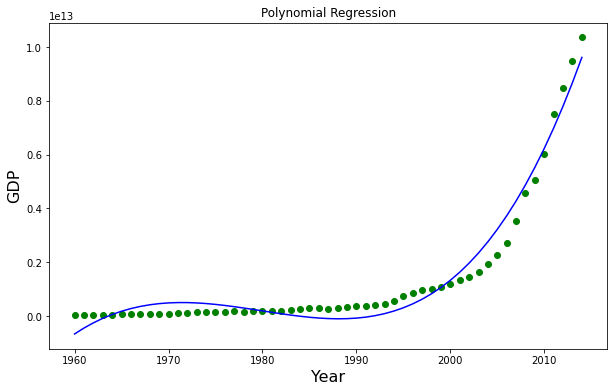

In [39]:
# Visualise the polynomial Regression results
plt.figure(figsize=(10,6))
plt.title('Polynomial Regression')
plt.scatter(X, y, color='green')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP', fontsize=16)
plt.show()